In [1]:
from qiskit_aer import AerSimulator
from qiskit import *
import supermarq
from qiskit.providers.fake_provider import *
import numpy as np 
import os

########## INPUT ############
f=5 # number of fake_backend want to choose
lower_limit= 3 # the lower limit of qubits for the circuit
upper_limit= 12 # the lower limit of qubits for the circuit
steps= 2 #jump in qubit numbers
name_of_algo='qaoa_fermionic'

In [2]:
all_fakes=[FakeAlmadenV2,FakeArmonkV2,FakeAthensV2,FakeAuckland,FakeBelemV2,FakeBoeblingenV2,FakeBogotaV2,FakeBrooklynV2,FakeBurlingtonV2,FakeCairoV2,FakeCambridgeV2,FakeCasablancaV2,FakeEssexV2,FakeGeneva,FakeGuadalupeV2,FakeHanoiV2,FakeJakartaV2,FakeJohannesburgV2,FakeKolkataV2,FakeLagosV2,FakeLimaV2,FakeLondonV2,FakeManhattanV2,FakeManilaV2,FakeMelbourneV2,FakeMontrealV2,FakeMumbaiV2,FakeNairobiV2,FakeOslo,FakeOurenseV2,FakeParisV2,FakePerth,FakePrague,FakePoughkeepsieV2,FakeQuitoV2,FakeRochesterV2,FakeRomeV2,FakeSantiagoV2,FakeSherbrooke,FakeSingaporeV2,FakeSydneyV2,FakeTorontoV2,FakeValenciaV2,FakeVigoV2,FakeWashingtonV2,FakeYorktownV2]
import random; selected_fakes = random.sample(all_fakes, f)
selected_fakes  # having any randomly selected 5 fake backends out of 46 mentioned in the inital list

[qiskit.providers.fake_provider.backends.athens.fake_athens.FakeAthensV2,
 qiskit.providers.fake_provider.backends.prague.fake_prague.FakePrague,
 qiskit.providers.fake_provider.backends.kolkata.fake_kolkata.FakeKolkataV2,
 qiskit.providers.fake_provider.backends.rome.fake_rome.FakeRomeV2,
 qiskit.providers.fake_provider.backends.montreal.fake_montreal.FakeMontrealV2]

In [3]:
benchmarks=[]
for i in range(lower_limit,upper_limit,steps):
    label = name_of_algo+str(i)
    benchmarks.append((supermarq.qaoa_fermionic_swap_proxy.QAOAFermionicSwapProxy(i),label))
for i in benchmarks:
    circuit=i[0].qiskit_circuit()
    print("--------------------------",i[1],"---------------------------")
    #circuit.draw(output="mpl")
    print(circuit.draw())

-------------------------- qaoa_fermionic3 ---------------------------
      ┌───┐                   ┌───┐                                 »
 q_0: ┤ H ├──■────────────────┤ X ├──■──────────────────────────────»
      ├───┤┌─┴─┐┌────────────┐└─┬─┘┌─┴─┐                  ┌───┐     »
 q_1: ┤ H ├┤ X ├┤ Rz(-2.526) ├──■──┤ X ├──■───────────────┤ X ├──■──»
      ├───┤└───┘└────────────┘     └───┘┌─┴─┐┌───────────┐└─┬─┘┌─┴─┐»
 q_2: ┤ H ├─────────────────────────────┤ X ├┤ Rz(2.526) ├──■──┤ X ├»
      └───┘                             └───┘└───────────┘     └───┘»
m0: 3/══════════════════════════════════════════════════════════════»
                                                                    »
«                                   ┌───┐     ┌─────────────┐┌─┐   
« q_0: ───────■─────────────────────┤ X ├──■──┤ Rx(0.61533) ├┤M├───
«           ┌─┴─┐     ┌────────────┐└─┬─┘┌─┴─┐├─────────────┤└╥┘┌─┐
« q_1: ─────┤ X ├─────┤ Rz(-2.526) ├──■──┤ X ├┤ Rx(0.61533) ├─╫─┤M├
«      ┌────┴───┴────┐└────

In [4]:
benchmark_features = {}
for benchmark, label in benchmarks:
    benchmark_features[label] = [
        supermarq.converters.compute_communication_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_depth_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_entanglement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_liveness_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_measurement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_parallelism_with_qiskit(benchmark.qiskit_circuit()),]

from prettytable import PrettyTable 
 
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["Student Name", "Class", "Section", "Percentage"]) 
 
# Add rows 
myTable.add_row(["Leanord", "X", "B", "91.2 %"]) 
myTable.add_row(["Penny", "X", "C", "63.5 %"]) 
myTable.add_row(["Howard", "X", "A", "90.23 %"]) 
myTable.add_row(["Bernadette", "X", "D", "92.7 %"]) 
myTable.add_row(["Sheldon", "X", "A", "98.2 %"]) 
myTable.add_row(["Raj", "X", "B", "88.1 %"]) 
myTable.add_row(["Amy", "X", "B", "95.0 %"]) 
 
print(myTable)
print(benchmark_features)

{'qaoa_fermionic3': [0.6666666666666666, 1.0, 0.5, 0.6666666666666666, 0.0, 0.09999999999999998], 'qaoa_fermionic5': [0.4, 0.5, 0.6, 0.7391304347826086, 0.0, 0.2934782608695652], 'qaoa_fermionic7': [0.2857142857142857, 0.3333333333333333, 0.6428571428571429, 0.7741935483870968, 0.0, 0.3602150537634408], 'qaoa_fermionic9': [0.2222222222222222, 0.25, 0.6666666666666666, 0.7948717948717948, 0.0, 0.3942307692307693], 'qaoa_fermionic11': [0.18181818181818182, 0.2, 0.6818181818181818, 0.8085106382978723, 0.0, 0.4148936170212766]}


In [5]:
%time
import time
jobs =[]
print("=============SCORES OF ALL THE CIRCUITS=============")    
for backend in selected_fakes:
    print("-----------BACKEND-NAME :: ", backend().name,"----------------")
    for benchmark, label in benchmarks:
        circuit=benchmark.qiskit_circuit()
        score_list=[]
        timetaken=[]
        for i in range(0,5):
            job = backend().run(circuit, shots=1000)
            result = job.result()
            counts = job.result(0).get_counts()
            score = benchmark.score(counts)
            score_list.append(score)
            t=job.result(0).time_taken
            timetaken.append(t)
            print(i+1,"th iteration Execution time::",t)
        score = np.mean(score_list) 
        sd = np.std(score_list)
        execution_time = np.mean(timetaken)
        print("                      Average of Metadata-wise time taken ::",execution_time)
        print("                    ",label, "--> score::",score,"      SD ::",sd)
        jobs.append((label,benchmark,backend,job,score,sd))
#jobs

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 11 µs
=============SCORES OF ALL THE CIRCUITS=============
-----------BACKEND-NAME ::  fake_athens ----------------
1 th iteration Execution time:: 0.11777234077453613
2 th iteration Execution time:: 0.06914448738098145
3 th iteration Execution time:: 0.07185578346252441
4 th iteration Execution time:: 0.07248425483703613
5 th iteration Execution time:: 0.08425760269165039
                      Average of Metadata-wise time taken :: 0.0831028938293457
                     qaoa_fermionic3 --> score:: 0.9348000295026957       SD :: 0.0064000004342623295
1 th iteration Execution time:: 0.06303048133850098
2 th iteration Execution time:: 0.24022388458251953
3 th iteration Execution time:: 0.08791446685791016
4 th iteration Execution time:: 0.09717440605163574
5 th iteration Execution time:: 0.06967020034790039
                      Average of Metadata-wise time taken :: 0.11160268783569335
                     qaoa_fermionic5 --> scor

In [6]:
all_scores={}  
all_fake_names=[]
all_fake_scores=[]
for i in selected_fakes:
    fakes=i
    #print("SELCETED_FAKES:: ",i)
    i={}
    for label,benchmark,backend,job,score,sd in jobs:
        #supermarq.plotting.plot_results([score], [label])
        if fakes == backend:
            i[label] = score
    device_scores = 'device_score_' +str(fakes().name)
    all_scores[device_scores]= i
    all_fake_scores.append(i)
    all_fake_names.append(device_scores)   
#print(all_scores)    

USED BACKEND:: fake_athens ; CIRCUIT_NAME: qaoa_fermionic3 ; SCORE = 0.9348000295026957


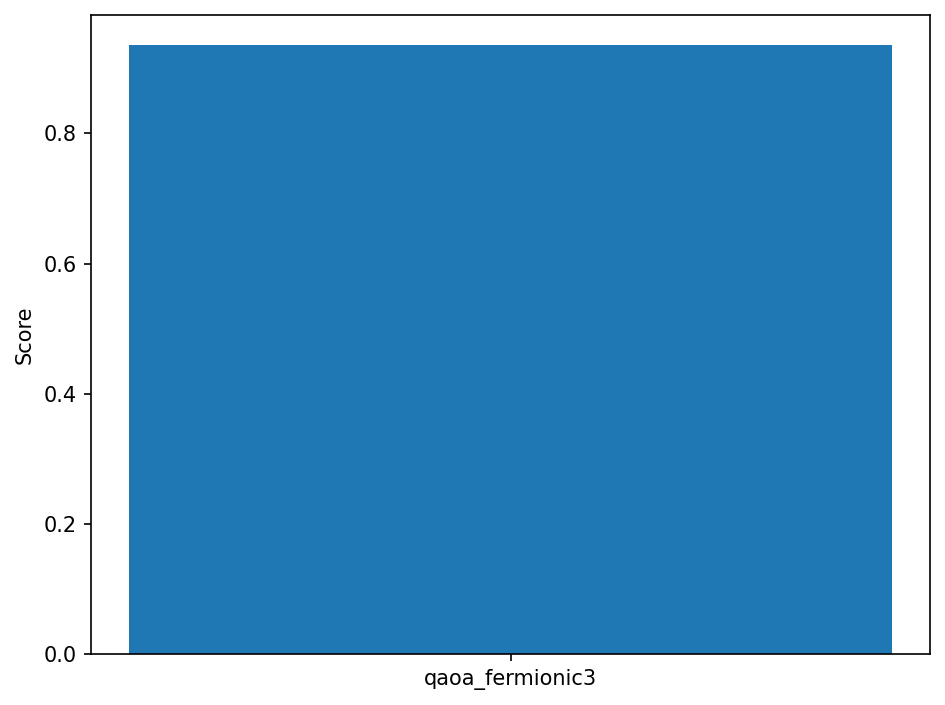

-----------------------------------------------------------
USED BACKEND:: fake_athens ; CIRCUIT_NAME: qaoa_fermionic5 ; SCORE = 0.26499999555268505


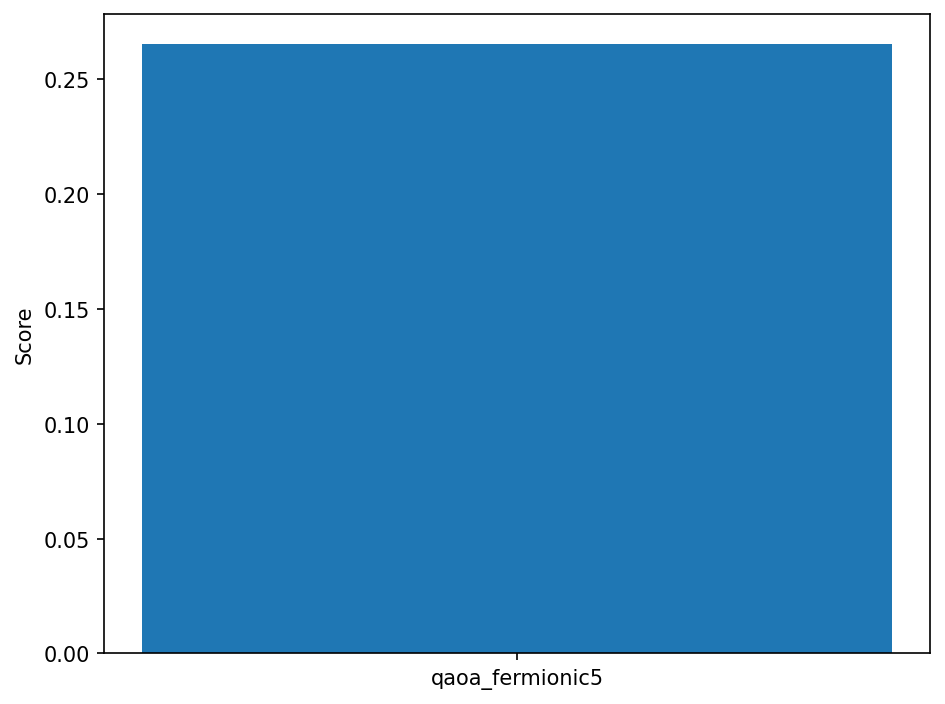

-----------------------------------------------------------
USED BACKEND:: fake_athens ; CIRCUIT_NAME: qaoa_fermionic7 ; SCORE = 0.5114185364911521


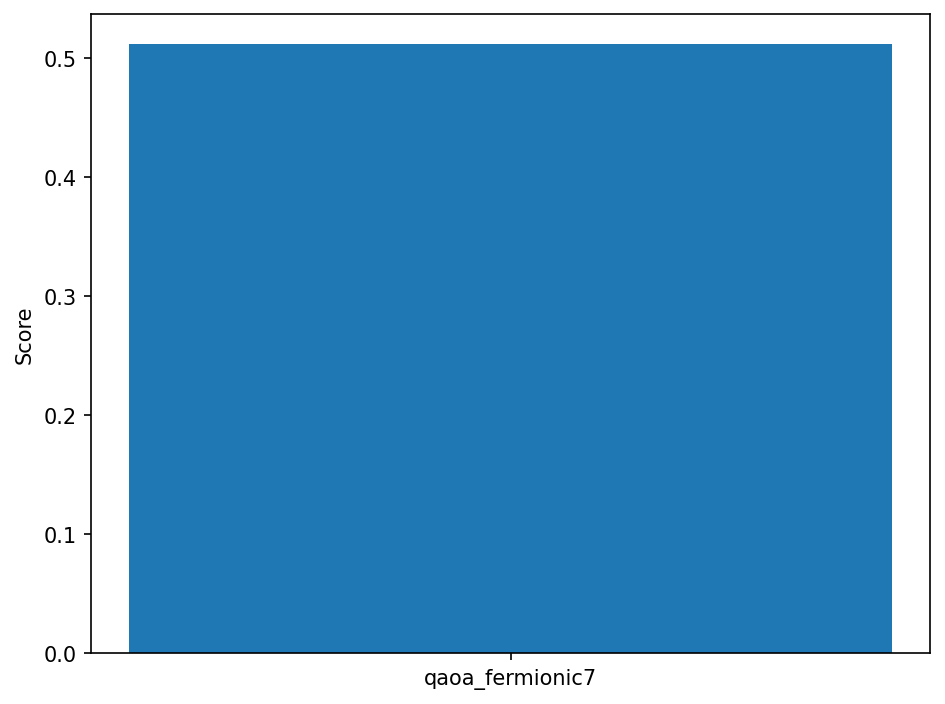

-----------------------------------------------------------
USED BACKEND:: fake_athens ; CIRCUIT_NAME: qaoa_fermionic9 ; SCORE = 0.5663181716373981


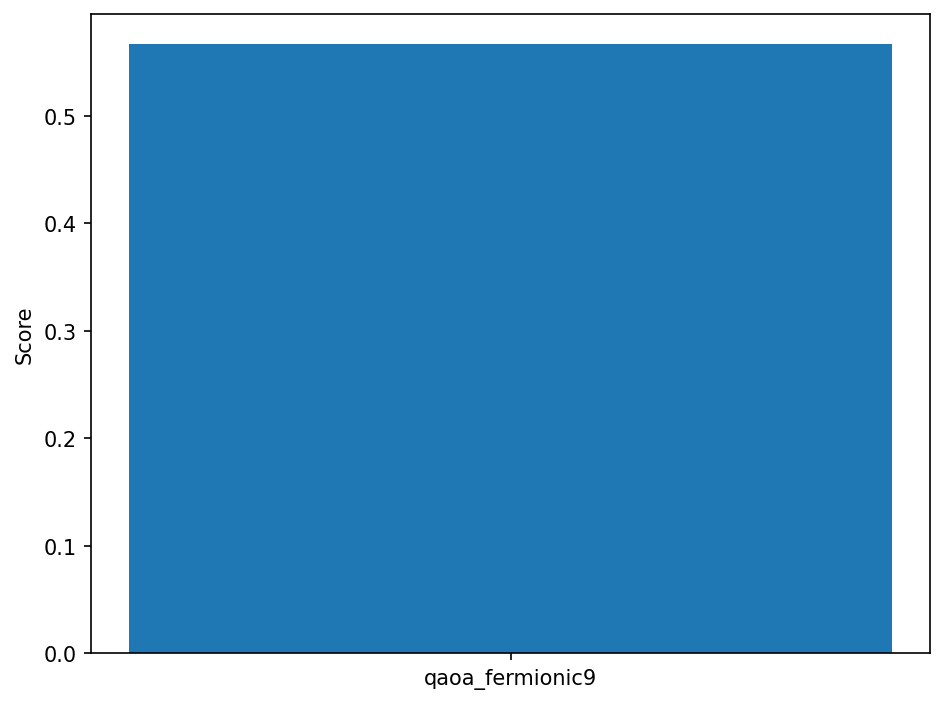

-----------------------------------------------------------
USED BACKEND:: fake_athens ; CIRCUIT_NAME: qaoa_fermionic11 ; SCORE = 0.7248561651753811


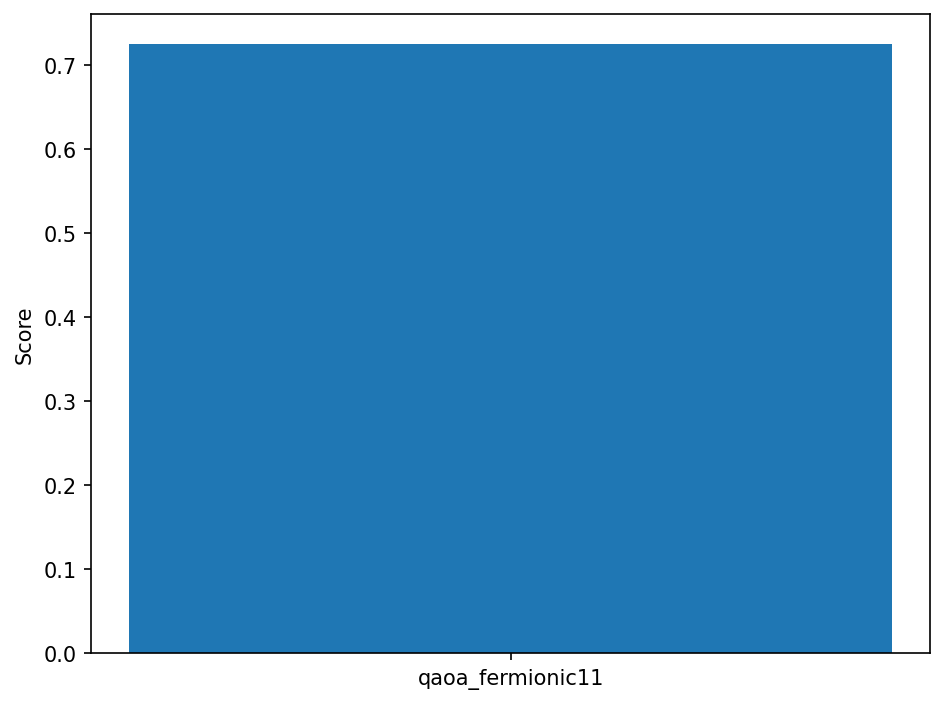

-----------------------------------------------------------
USED BACKEND:: fake_prague ; CIRCUIT_NAME: qaoa_fermionic3 ; SCORE = 0.9708000319454211


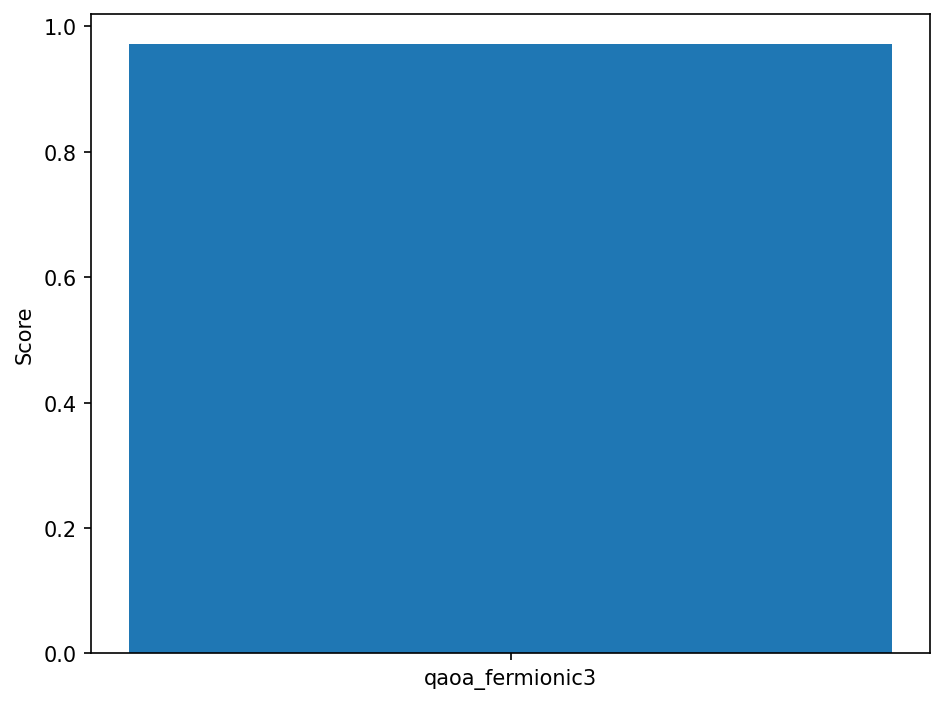

-----------------------------------------------------------
USED BACKEND:: fake_prague ; CIRCUIT_NAME: qaoa_fermionic5 ; SCORE = 0.033899991179176484


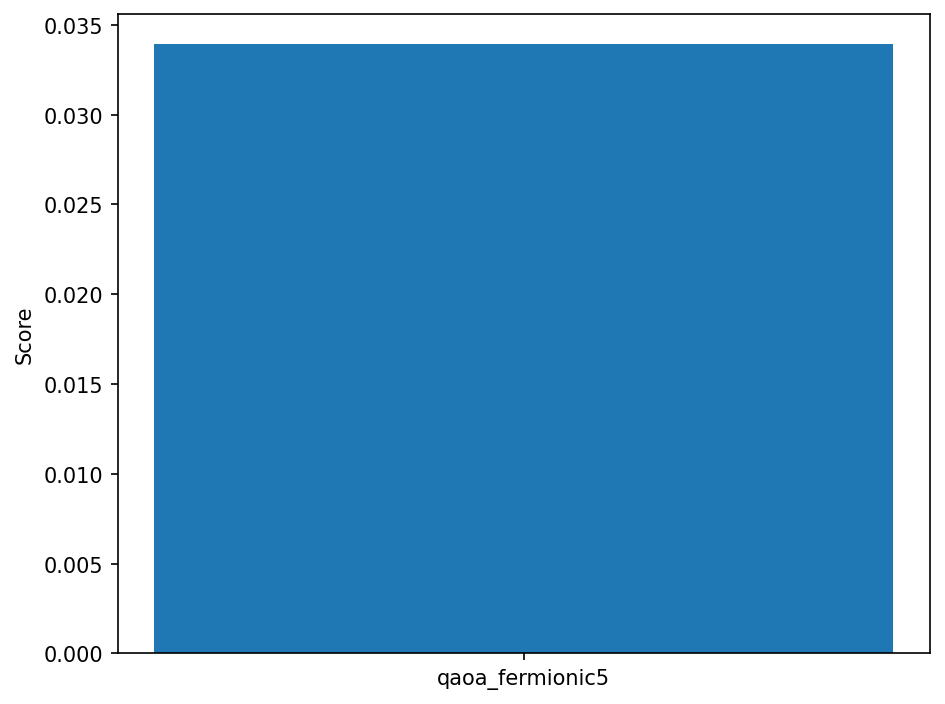

-----------------------------------------------------------
USED BACKEND:: fake_prague ; CIRCUIT_NAME: qaoa_fermionic7 ; SCORE = 0.5085927370564731


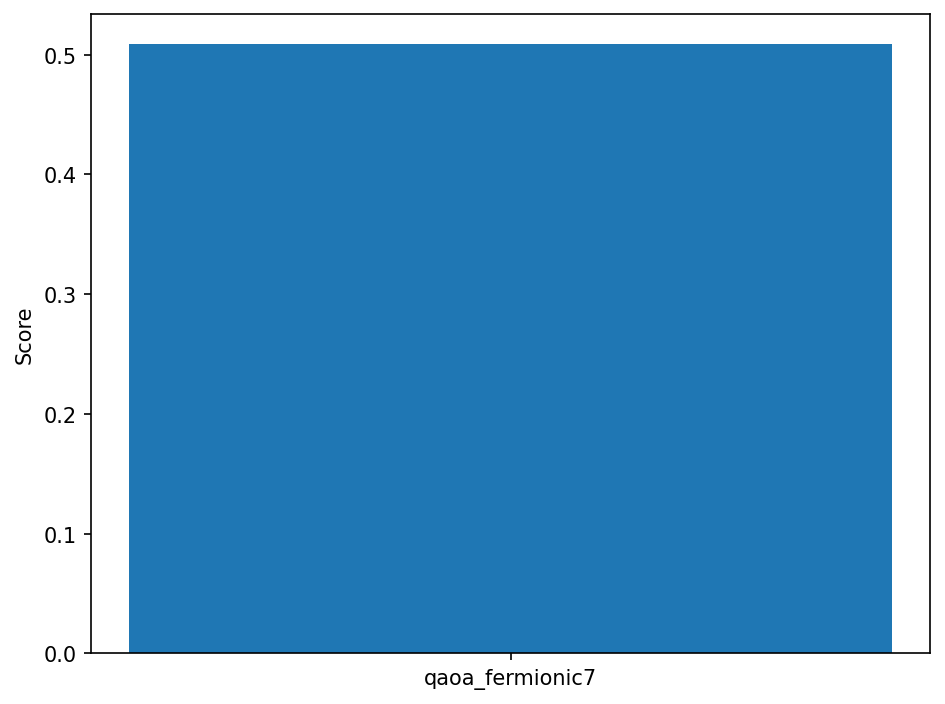

-----------------------------------------------------------
USED BACKEND:: fake_prague ; CIRCUIT_NAME: qaoa_fermionic9 ; SCORE = 0.5819381268542451


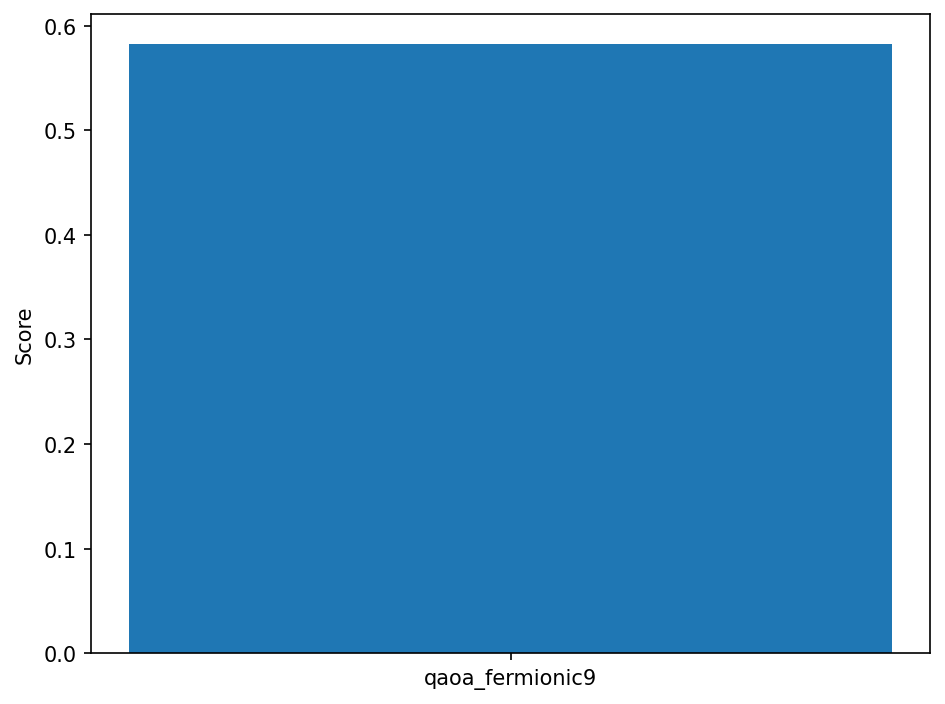

-----------------------------------------------------------
USED BACKEND:: fake_prague ; CIRCUIT_NAME: qaoa_fermionic11 ; SCORE = 0.8113581643896801


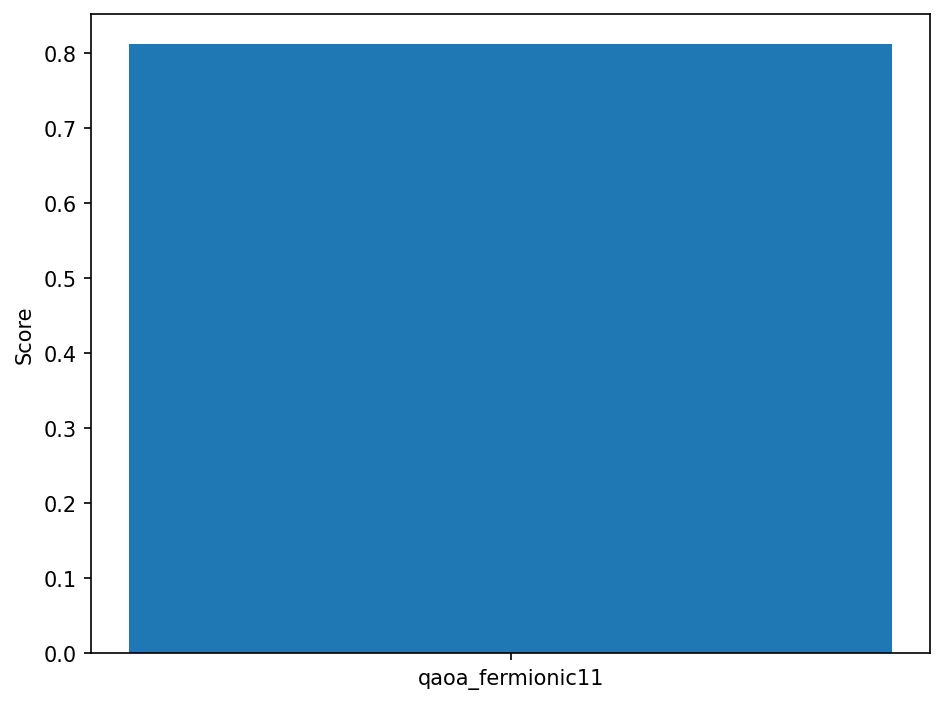

-----------------------------------------------------------
USED BACKEND:: fake_kolkata ; CIRCUIT_NAME: qaoa_fermionic3 ; SCORE = 0.945200030208372


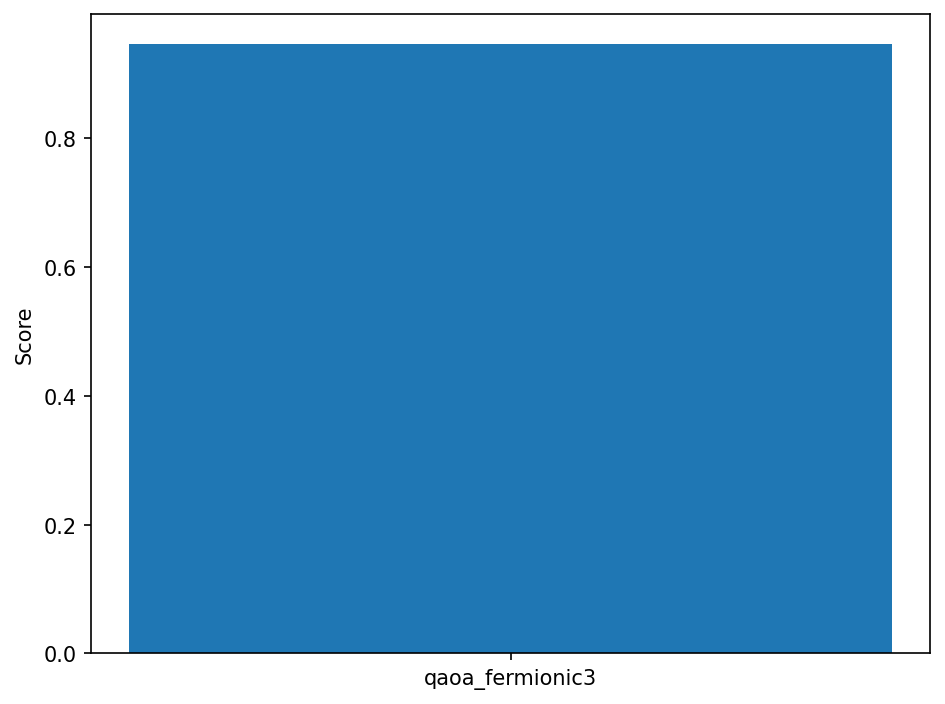

-----------------------------------------------------------
USED BACKEND:: fake_kolkata ; CIRCUIT_NAME: qaoa_fermionic5 ; SCORE = 0.1263999929297154


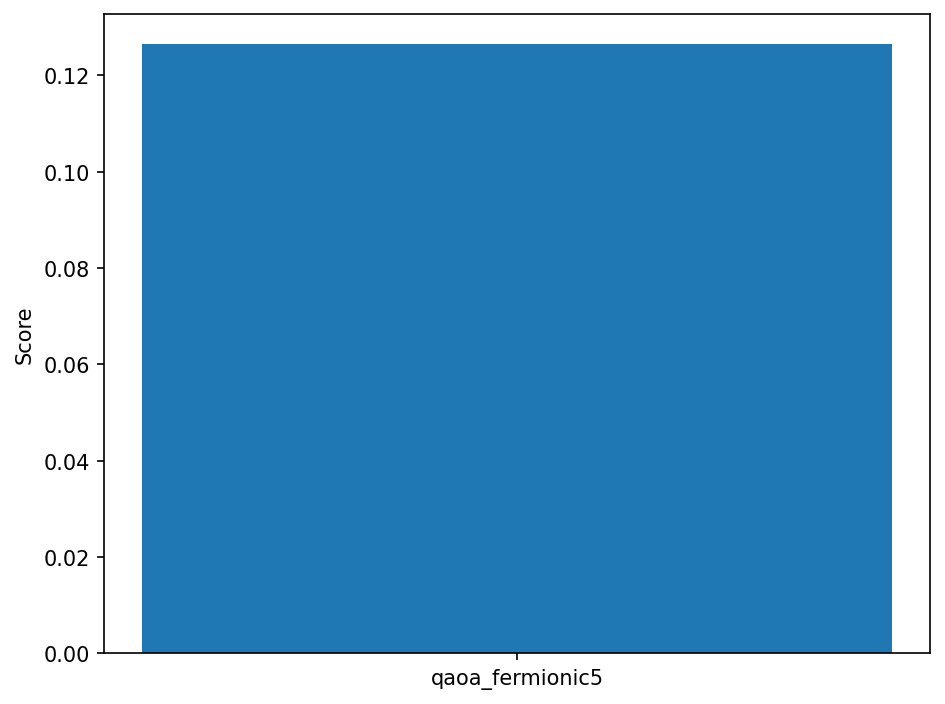

-----------------------------------------------------------
USED BACKEND:: fake_kolkata ; CIRCUIT_NAME: qaoa_fermionic7 ; SCORE = 0.5169547966080743


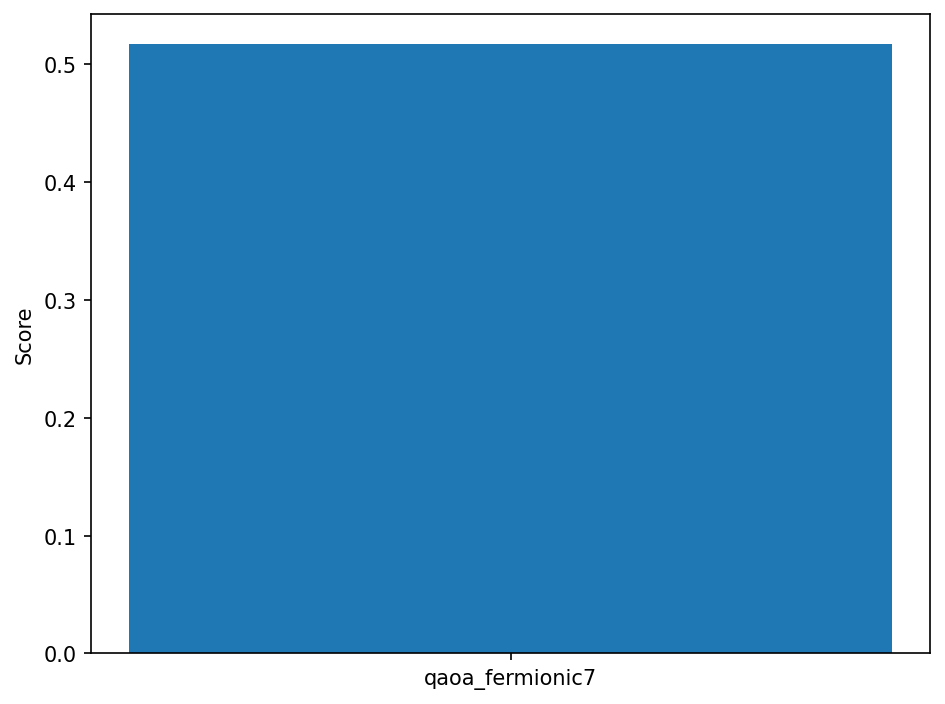

-----------------------------------------------------------
USED BACKEND:: fake_kolkata ; CIRCUIT_NAME: qaoa_fermionic9 ; SCORE = 0.5752210130067272


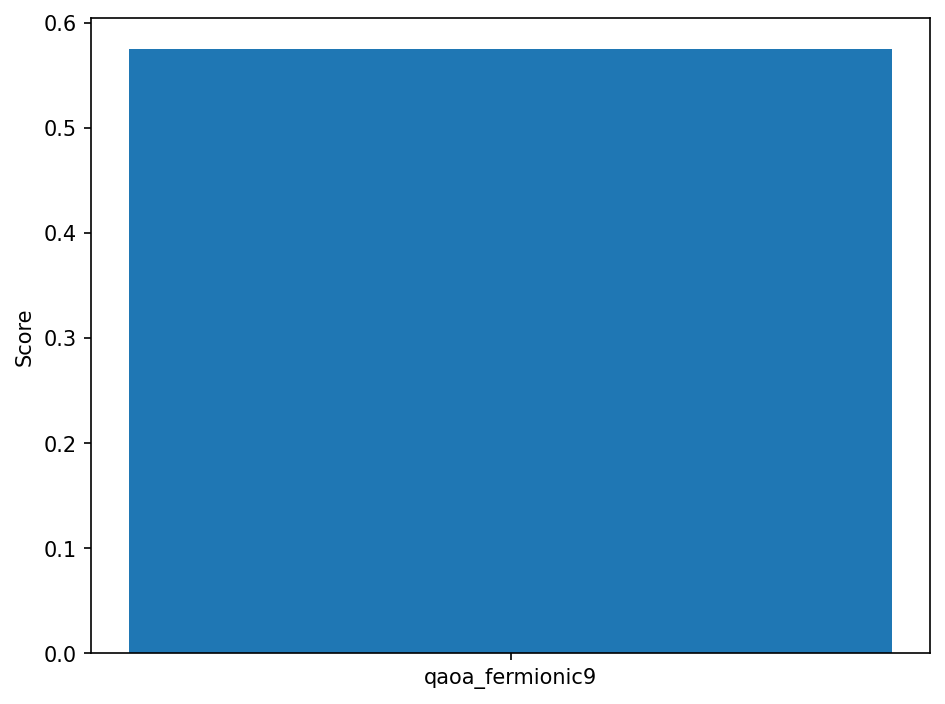

-----------------------------------------------------------
USED BACKEND:: fake_kolkata ; CIRCUIT_NAME: qaoa_fermionic11 ; SCORE = 0.7435294829084631


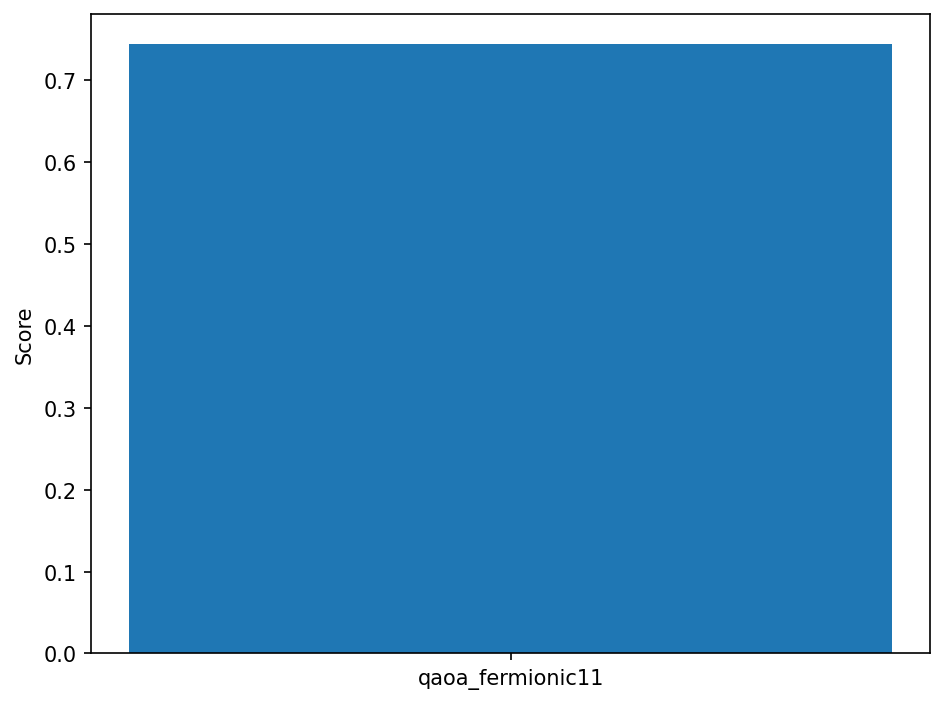

-----------------------------------------------------------
USED BACKEND:: fake_rome ; CIRCUIT_NAME: qaoa_fermionic3 ; SCORE = 0.8980000270056874


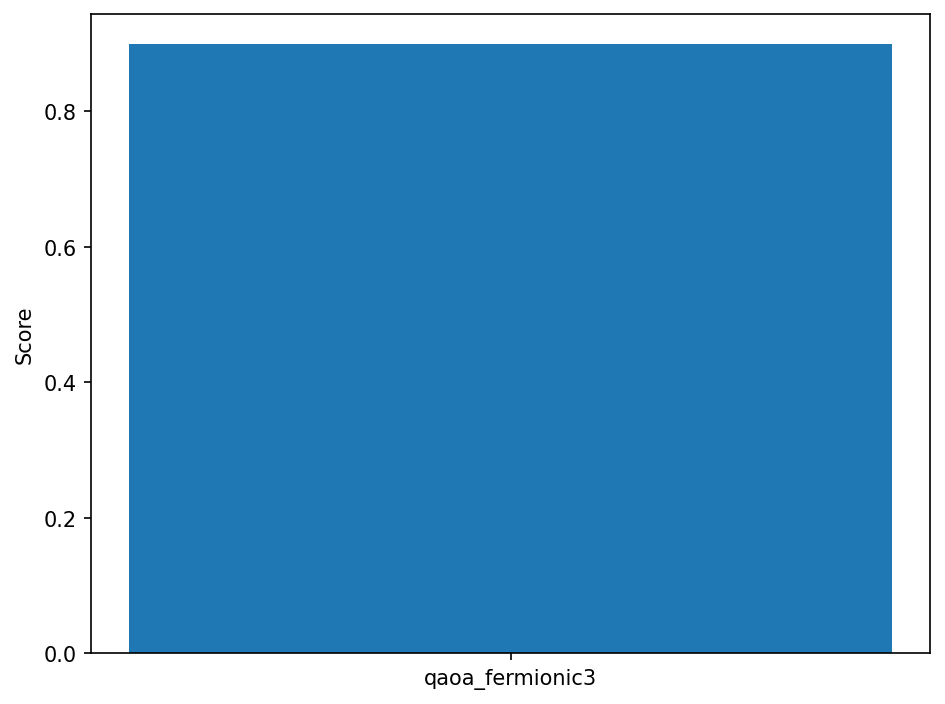

-----------------------------------------------------------
USED BACKEND:: fake_rome ; CIRCUIT_NAME: qaoa_fermionic5 ; SCORE = 0.17519999385324297


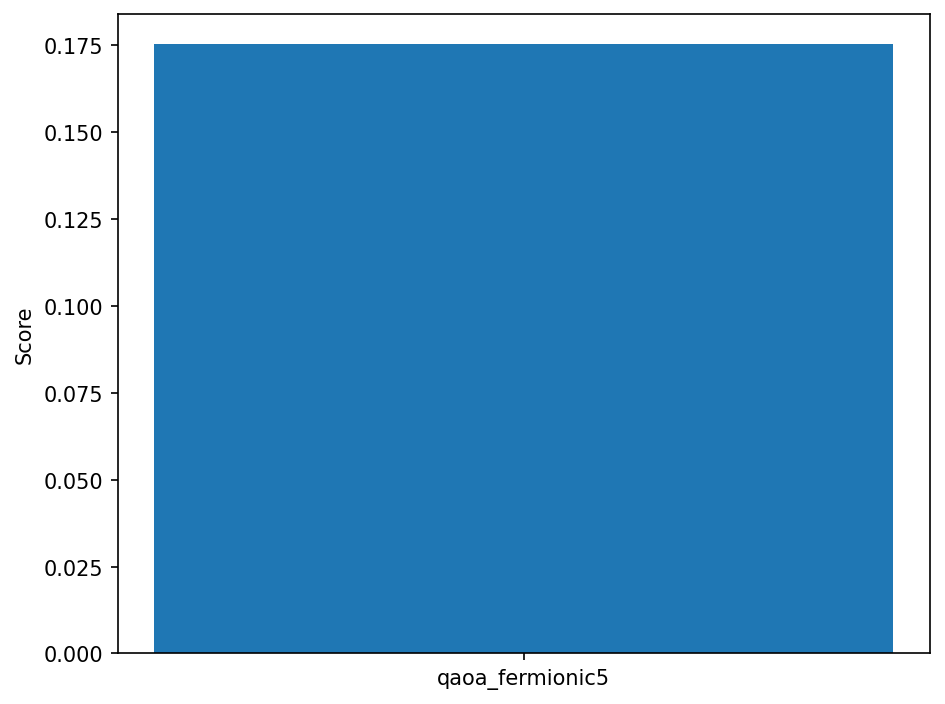

-----------------------------------------------------------
USED BACKEND:: fake_rome ; CIRCUIT_NAME: qaoa_fermionic7 ; SCORE = 0.5223180485963427


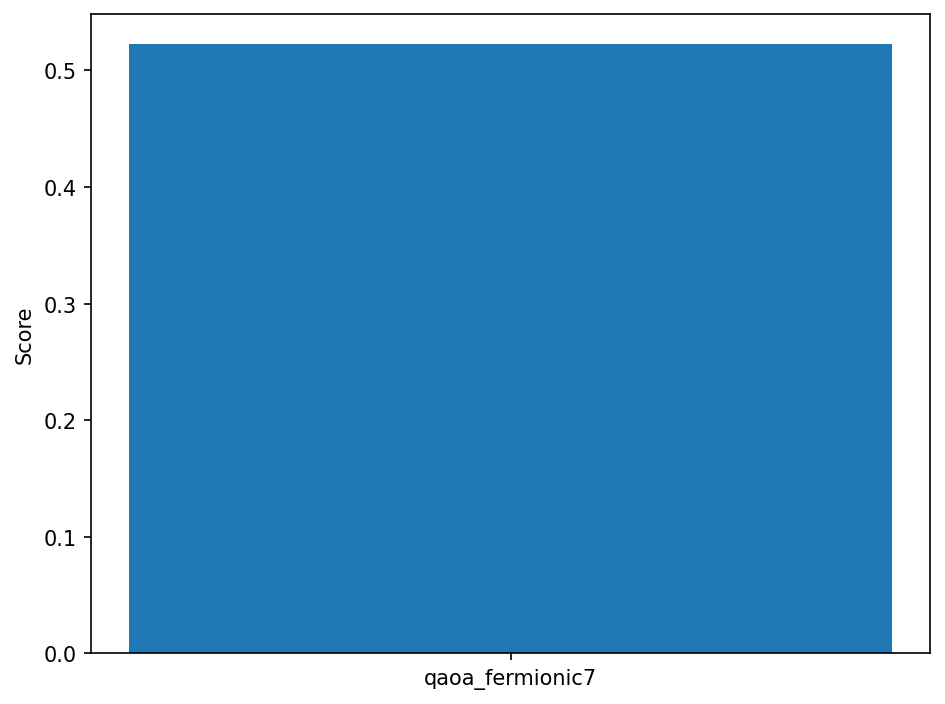

-----------------------------------------------------------
USED BACKEND:: fake_rome ; CIRCUIT_NAME: qaoa_fermionic9 ; SCORE = 0.5803388140334074


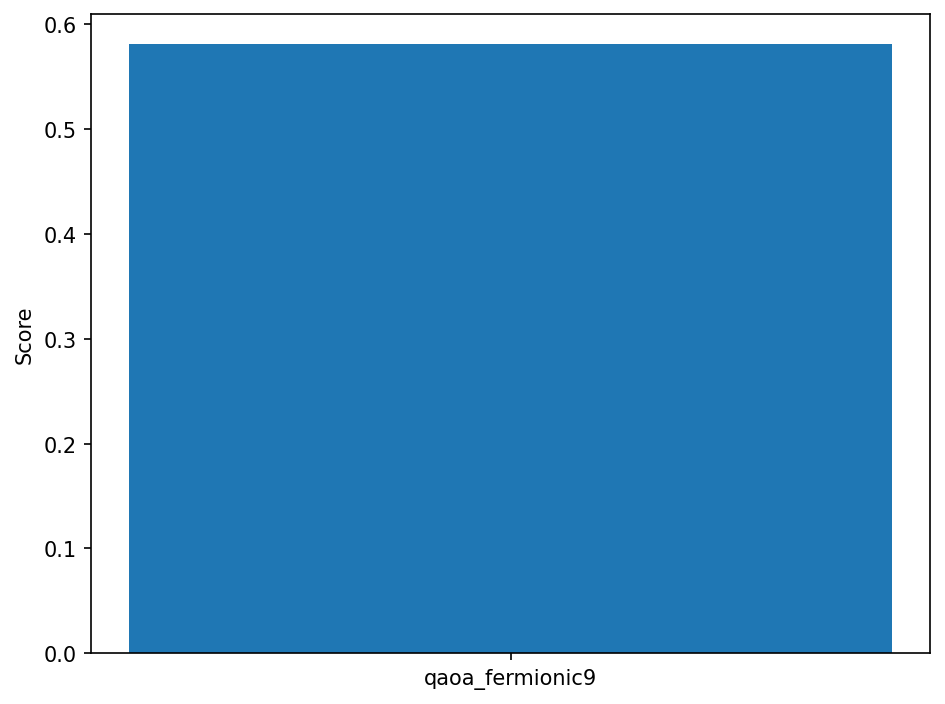

-----------------------------------------------------------
USED BACKEND:: fake_rome ; CIRCUIT_NAME: qaoa_fermionic11 ; SCORE = 0.7512930066924579


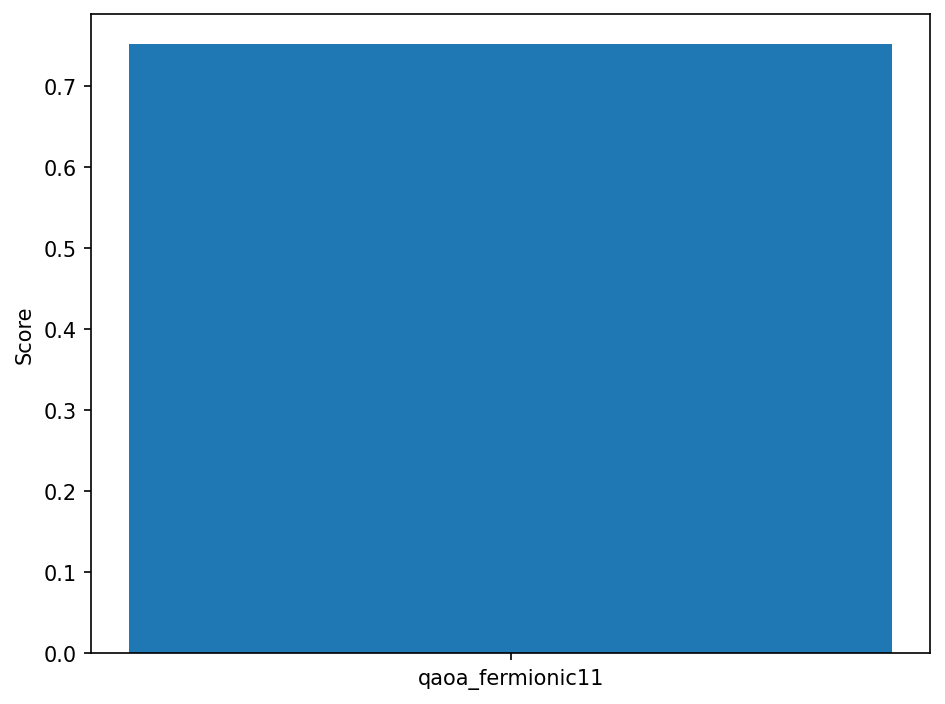

-----------------------------------------------------------
USED BACKEND:: fake_montreal ; CIRCUIT_NAME: qaoa_fermionic3 ; SCORE = 0.8996000271142529


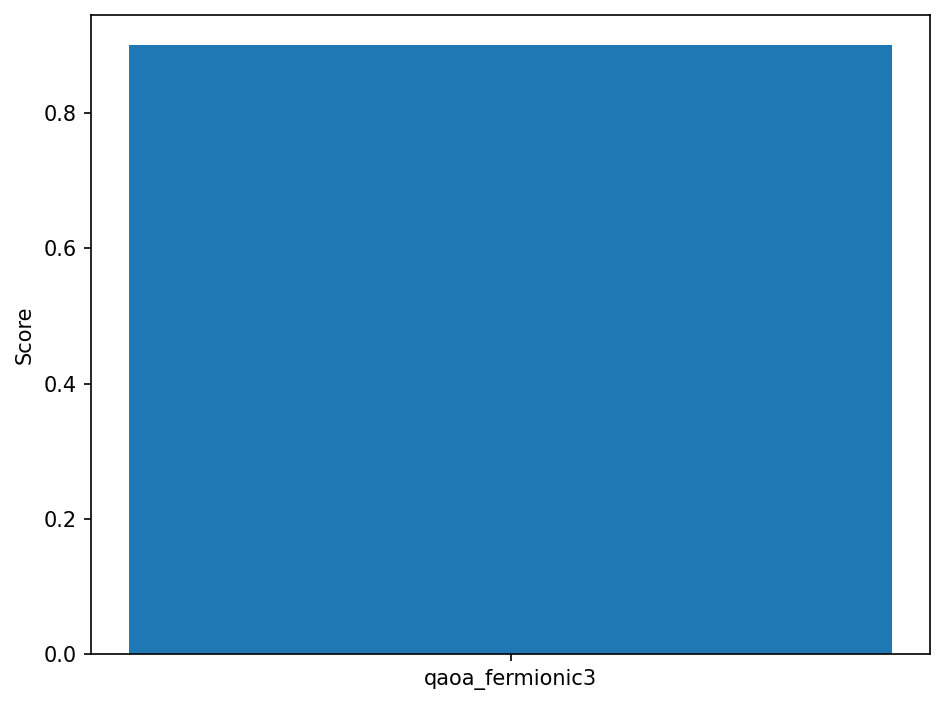

-----------------------------------------------------------
USED BACKEND:: fake_montreal ; CIRCUIT_NAME: qaoa_fermionic5 ; SCORE = 0.15789999352584483


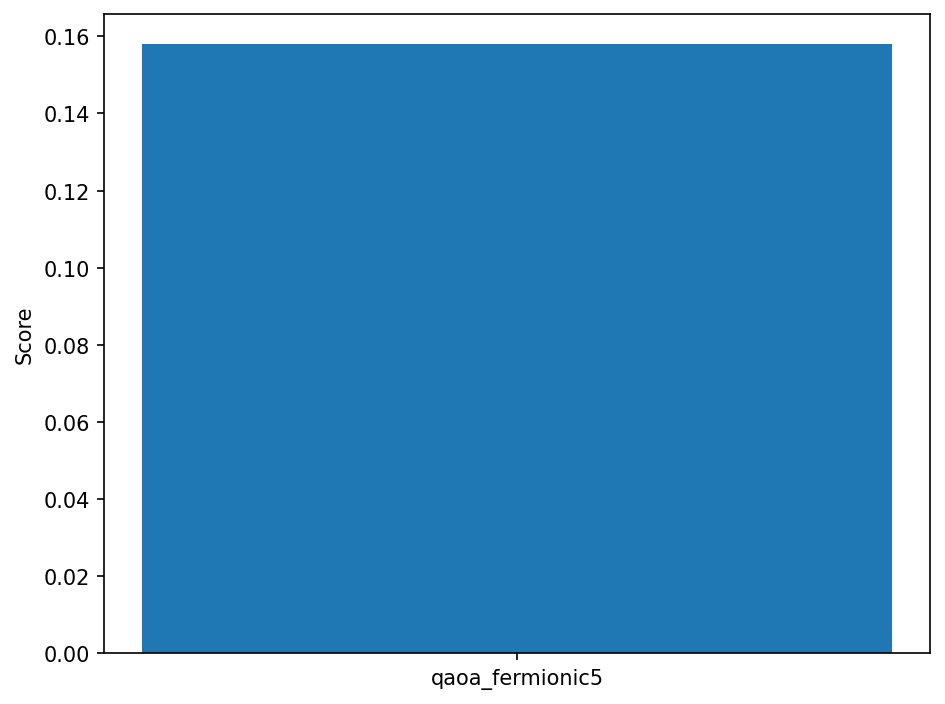

-----------------------------------------------------------
USED BACKEND:: fake_montreal ; CIRCUIT_NAME: qaoa_fermionic7 ; SCORE = 0.527911978089483


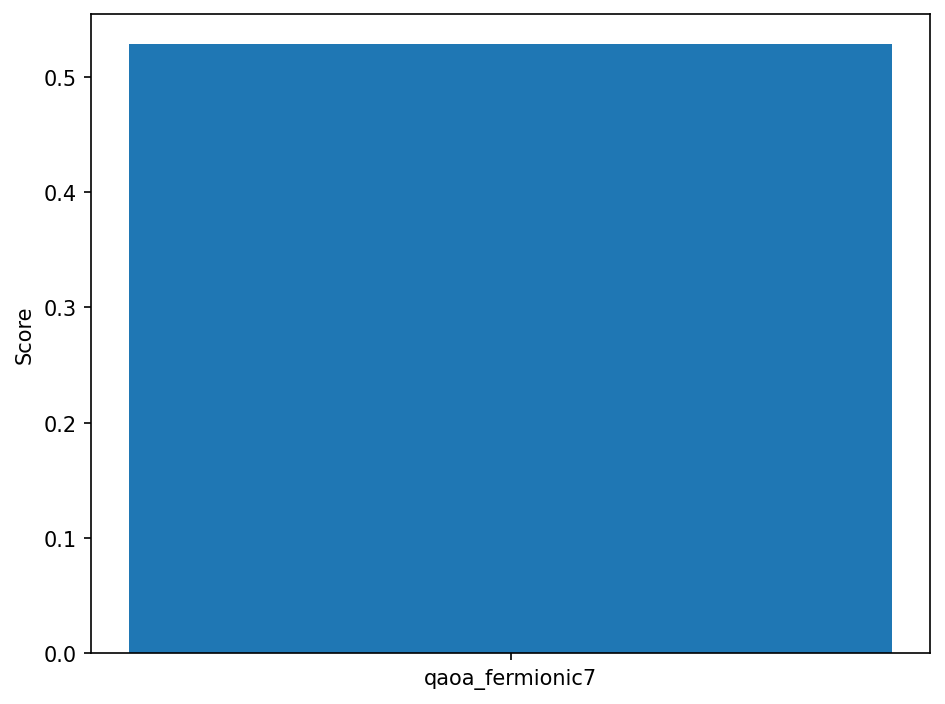

-----------------------------------------------------------
USED BACKEND:: fake_montreal ; CIRCUIT_NAME: qaoa_fermionic9 ; SCORE = 0.5688770721507381


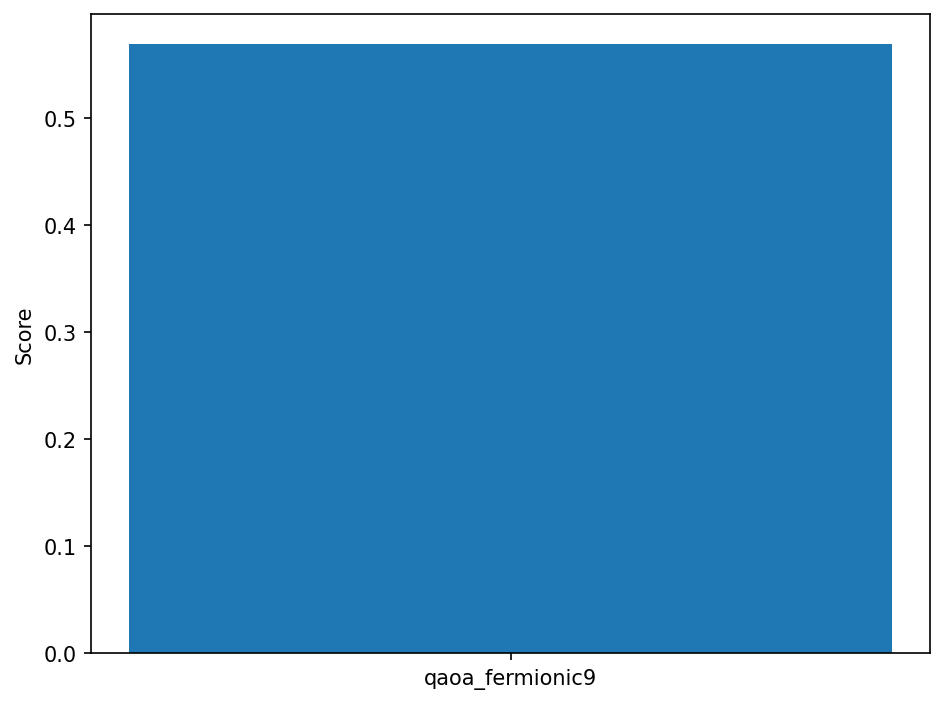

-----------------------------------------------------------
USED BACKEND:: fake_montreal ; CIRCUIT_NAME: qaoa_fermionic11 ; SCORE = 0.7101054699857908


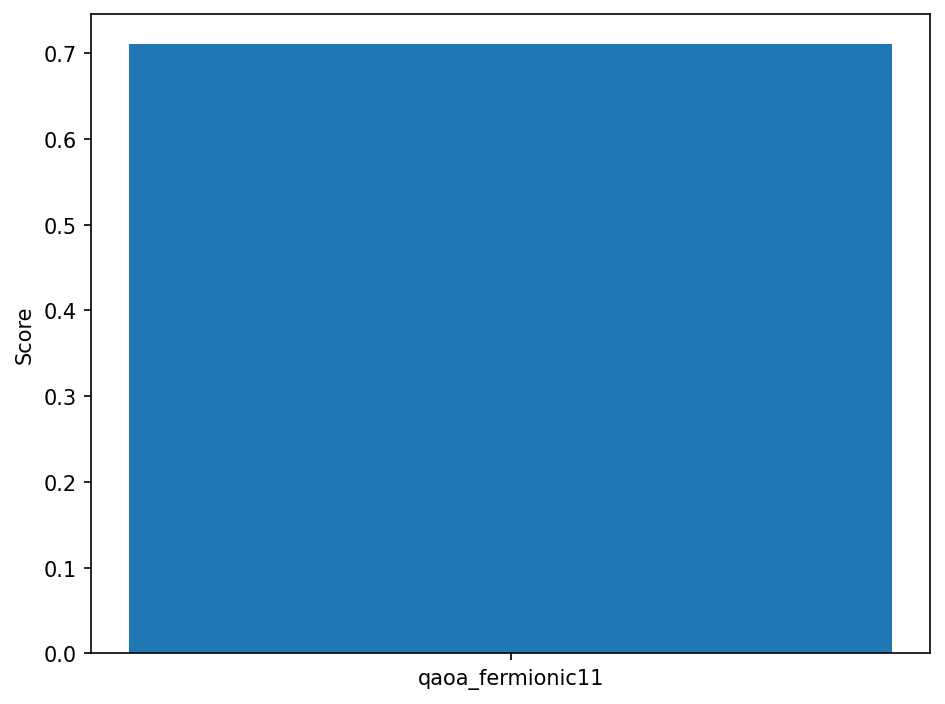

-----------------------------------------------------------


In [7]:
for label,benchmark,backend,job,score,sd in jobs:
    print("USED BACKEND::",backend().name,"; CIRCUIT_NAME:",label, "; SCORE =",score)
    supermarq.plotting.plot_results([score], [label])
    print("-----------------------------------------------------------")

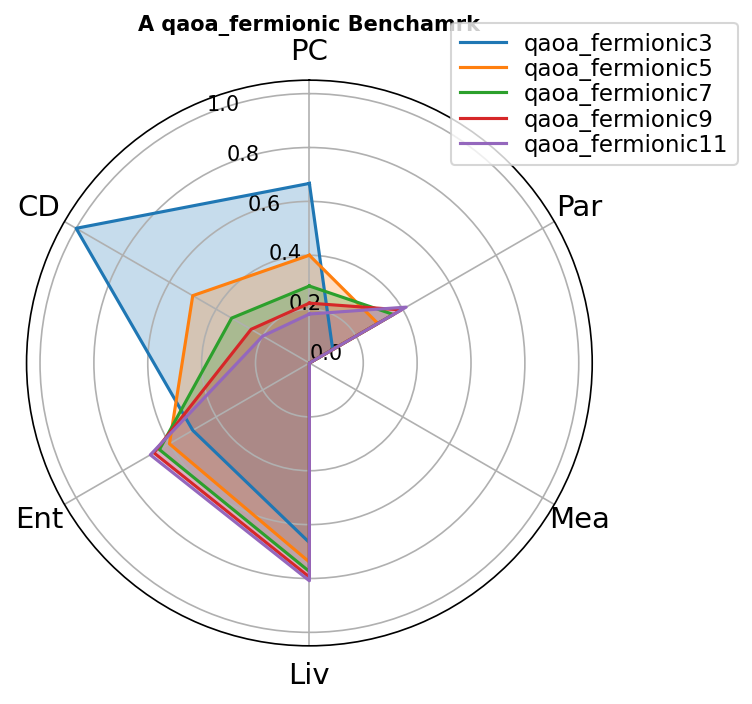

In [8]:
names=[]
scores=[]
X="A "+name_of_algo+' Benchamrk'
for i,j in benchmark_features.items():
    names.append(i)
    scores.append(j)
supermarq.plotting.plot_benchmark([X,names,scores],
        spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"],show=True)

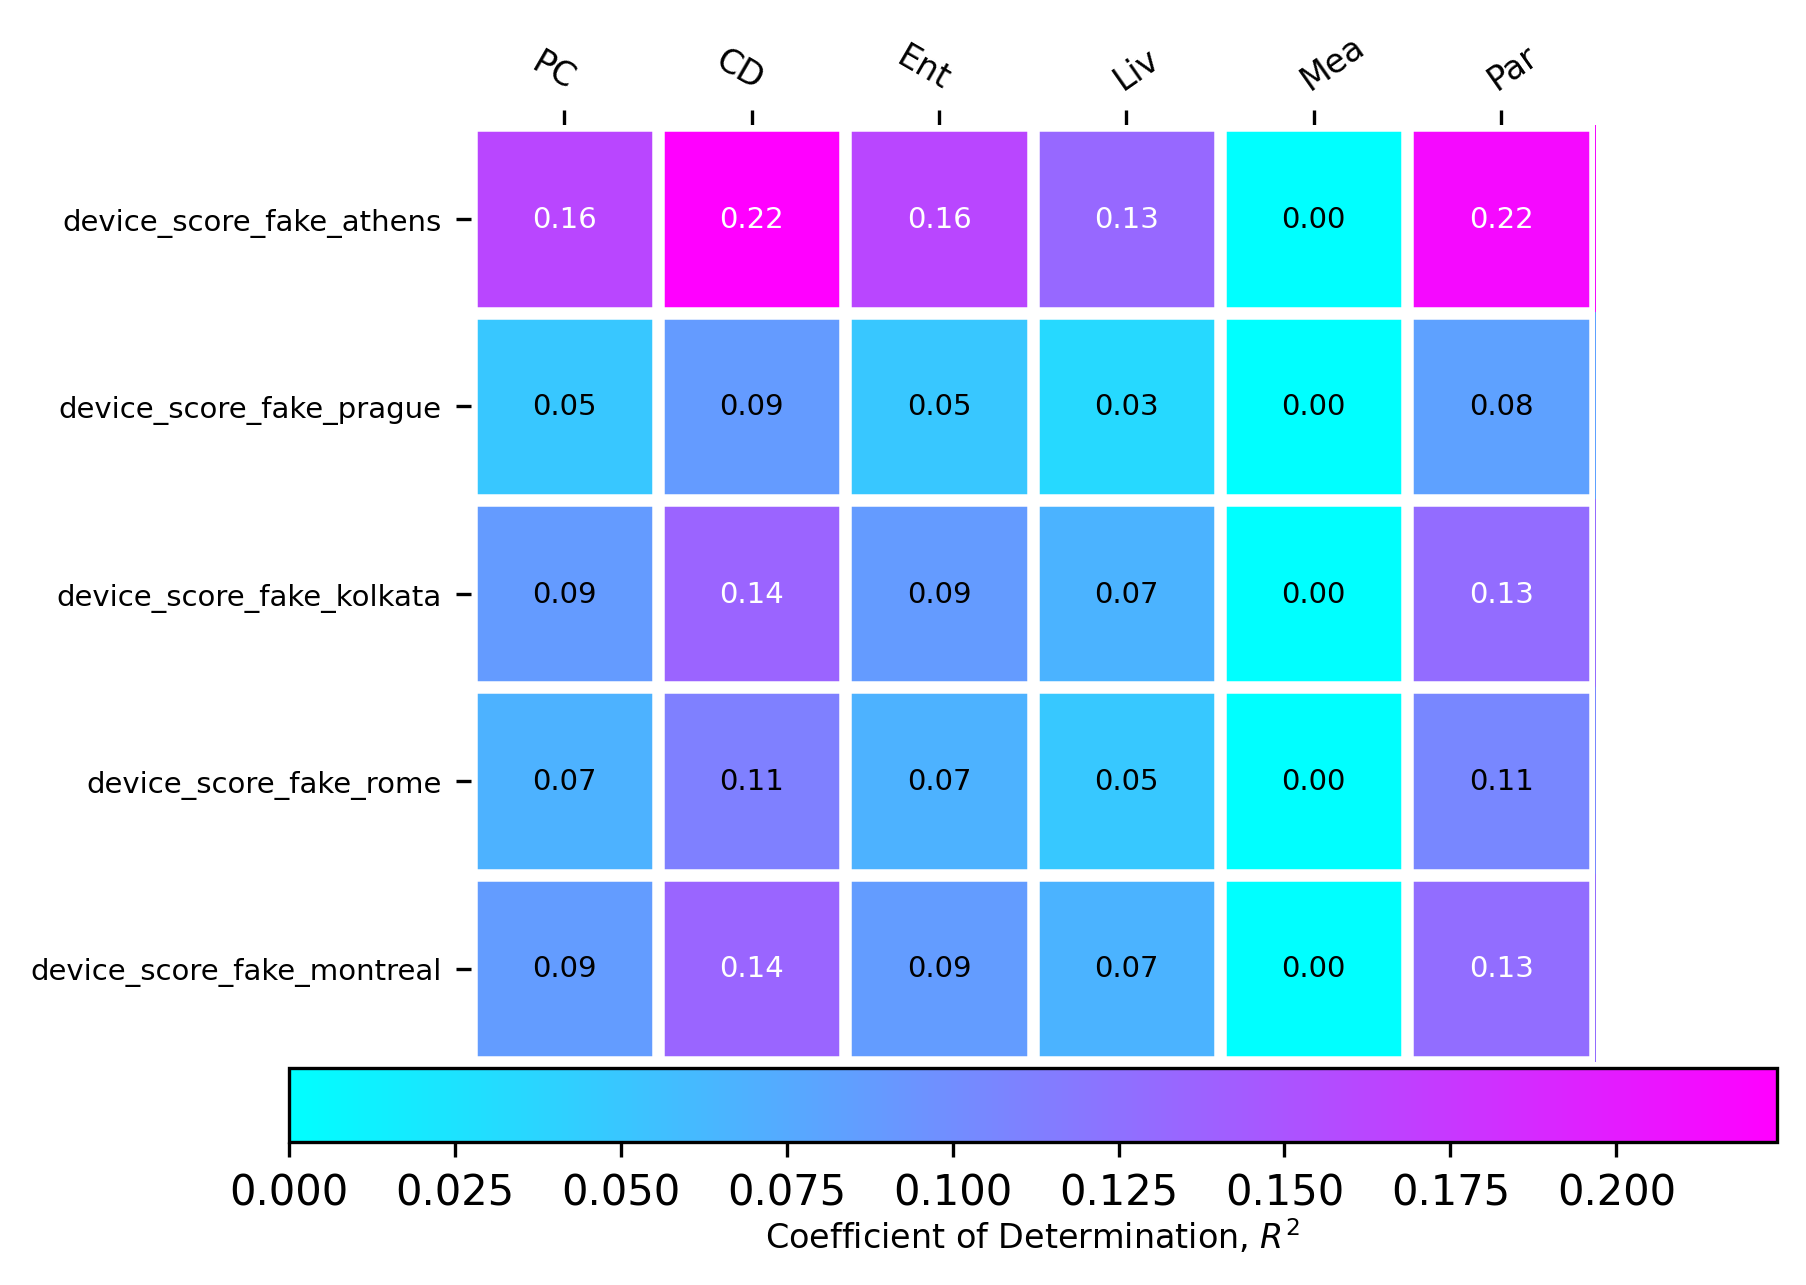

In [9]:
supermarq.plotting.plot_correlations(benchmark_features,all_fake_scores,["PC", "CD", "Ent", "Liv", "Mea", "Par"],device_name=all_fake_names,show=True,)

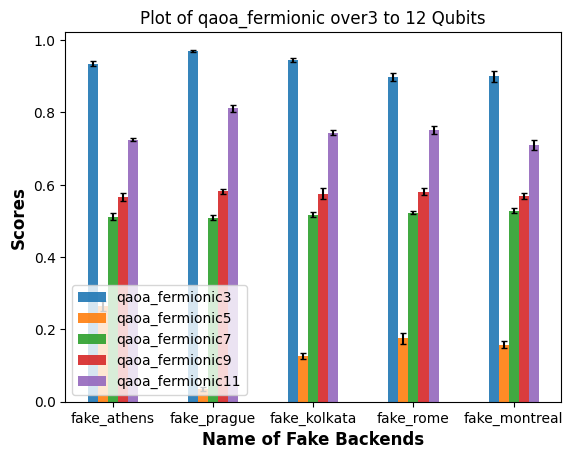

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np
all_fake_names=[]
all_score=[]
all_sd=[]
all_ckt=[]
v='Plot of '+name_of_algo+' over'+str(lower_limit)+' to '+str(upper_limit)+ ' Qubits'
for i in selected_fakes:
    all_fake_names.append(i().name)    
for benchmark, label in benchmarks:
    i=[]
    j=[]
    k=[]
    for ckt,benchmark,backend,job,score,sd in jobs:
        if ckt == label:
            i.append(score)
            j.append(sd)
    all_ckt.append(label)
    all_score.append(i)
    all_sd.append(j)
num_bars = len(all_score)
width = 0.1
x = np.arange(len(all_fake_names)) # x-axis positions for each bar
fig, ax = plt.subplots()
for i in range(num_bars):               # Create bars for each category with appropriate offsets
    ax.bar(x + i * width, all_score[i], width=width, label=f'Bar {i+1}', 
           yerr=all_sd[i],align='center',alpha=0.9,ecolor='black',capsize=2)
ax.set_xlabel('Name of Fake Backends',fontweight ='bold',fontsize = 12)
ax.set_ylabel('Scores',fontweight ='bold',fontsize = 12)
ax.set_title(v)
ax.set_xticks(x + (num_bars - 1) * width / 2)
ax.set_xticklabels(all_fake_names)
ax.legend(all_ckt,loc="lower left")
#ax.grid(True)
plt.show()